In [1]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
IRIS = load_iris()

In [3]:
names = [(name
  .replace(" ", "")
  .replace("(cm)", "")) for name in IRIS.feature_names]

In [4]:
df = pd.DataFrame(IRIS.data)
df.columns = names
df['label'] = IRIS.target
df.label = df.label.astype('category')
df = pd.get_dummies(df)
df = df.sample(df.shape[0])

In [12]:
df.head()

,sepallength,sepalwidth,petallength,petalwidth,label_0,label_1,label_2
16,5.4,3.9,1.3,0.4,1,0,0
72,6.3,2.5,4.9,1.5,0,1,0
71,6.1,2.8,4.0,1.3,0,1,0
2,4.7,3.2,1.3,0.2,1,0,0
67,5.8,2.7,4.1,1.0,0,1,0


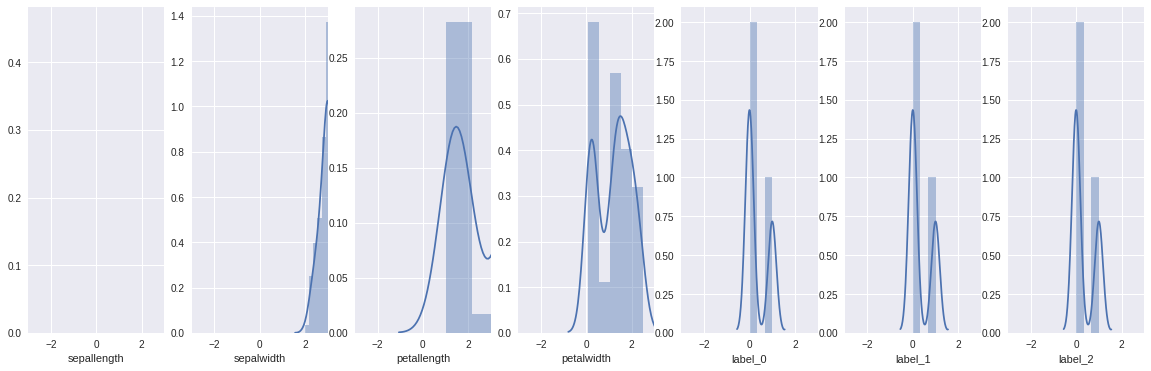

In [5]:
fig = plt.figure(figsize=(20,6))
for i, col in enumerate(df.columns):
    fig.add_subplot(1,7,1+i)
    sns.distplot(df[col])
    plt.xlim(-3,3)

In [6]:
def gelman_scale(series):
    return (series - series.mean())/(2*series.std())

def standard_scale(series):
    return (series - series.mean())/(series.std())

df_gelman = df.copy()
df_standard = df.copy()

df_gelman.sepallength = gelman_scale(df.sepallength)
df_gelman.sepalwidth = gelman_scale(df.sepalwidth)
df_gelman.petallength = gelman_scale(df.petallength)
df_gelman.petalwidth = gelman_scale(df.petalwidth)
df_standard.sepallength = standard_scale(df.sepallength)
df_standard.sepalwidth = standard_scale(df.sepalwidth)
df_standard.petallength = standard_scale(df.petallength)
df_standard.petalwidth = standard_scale(df.petalwidth)

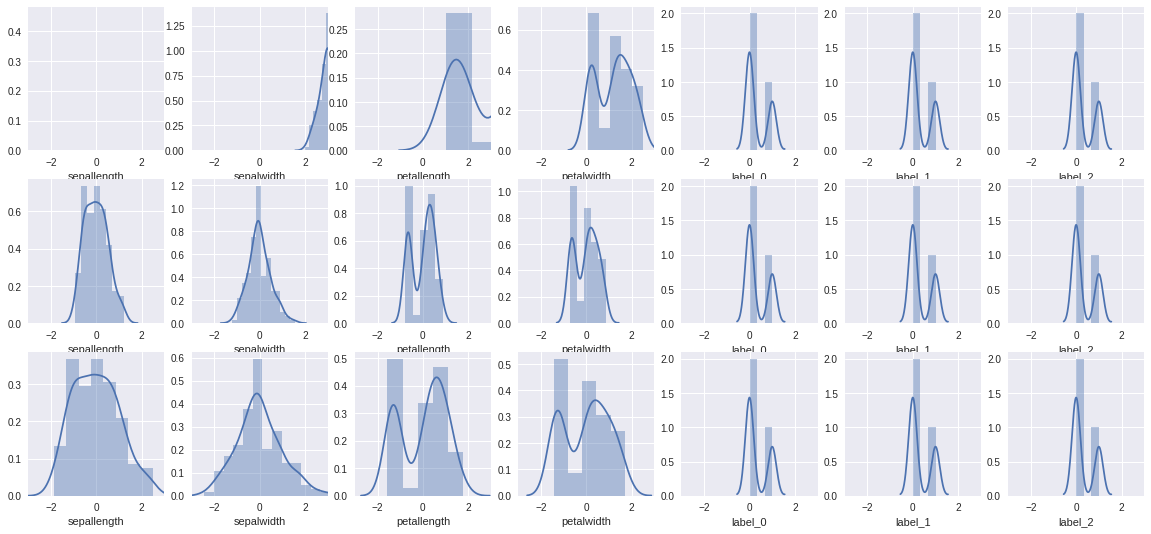

In [13]:
fig = plt.figure(figsize=(20,9))
for i, col in enumerate(df.columns):
    fig.add_subplot(3,7,1+i)
    sns.distplot(df[col])
    plt.xlim(-3,3)
    fig.add_subplot(3,7,8+i)
    sns.distplot(df_gelman[col])
    plt.xlim(-3,3)
    fig.add_subplot(3,7,15+i)
    sns.distplot(df_standard[col])
    plt.xlim(-3,3)

In [14]:
from sklearn.decomposition import PCA

In [15]:
from IPython import get_ipython
get_ipython().run_line_magic('matplotlib', 'inline')

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd
import numpy as np

def pca_results(dataframe, pca):


    dimensions = dimensions = ['PC {}'.format(i) for i in range(1,len(pca.components_)+1)]

    components = pd.DataFrame(np.round(pca.components_, 4), columns = dataframe.columns)
    components.index = dimensions

    ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1)
    variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance'])
    variance_ratios.index = dimensions

    fig, ax = plt.subplots(figsize = (14,8))

    components.plot(ax = ax, kind = 'bar', colormap=cm.viridis);
    ax.set_ylabel("Feature Weights")
    ax.set_xticklabels(dimensions, rotation=0)


    for i, ev in enumerate(pca.explained_variance_ratio_):
        ax.text(i-0.40, ax.get_ylim()[1] + 0.05, "Explained Variance\n          %.4f"%(ev))

    # Return a concatenated DataFrame
    return pd.concat([variance_ratios, components], axis = 1)

In [10]:
pca_gelman = PCA()
pca_standard = PCA()
pca_gelman.fit(df_gelman)
pca_standard.fit(df_standard)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

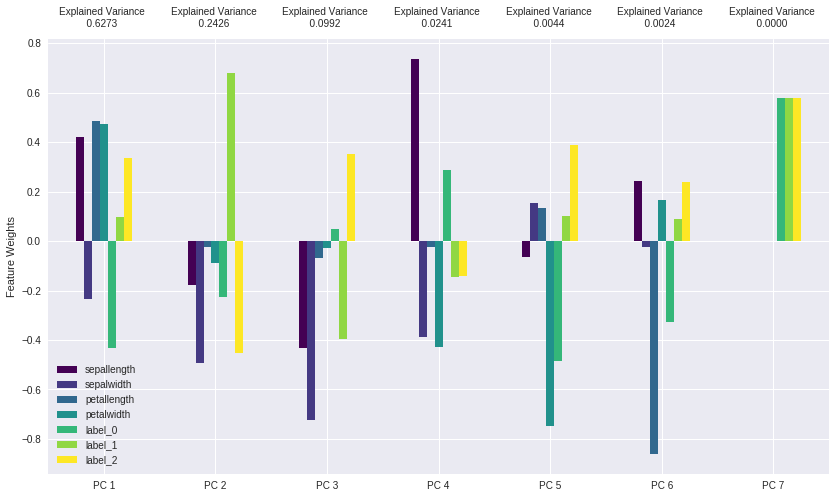

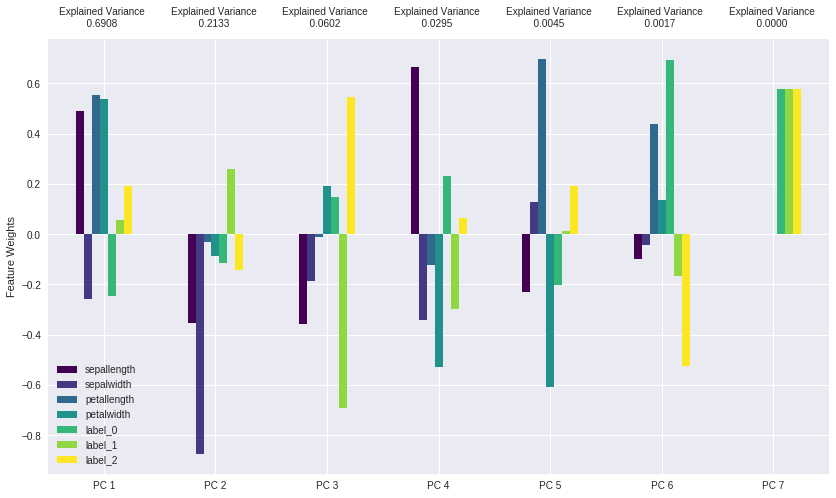

In [11]:
pca_results(df_gelman, pca_gelman)
pca_results(df_standard, pca_standard);